In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from scipy import stats
import math

from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


import tensorflow as tf

sns.set_style("whitegrid")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("WineQT.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


**Checking for NULL values**

```there are none```

In [6]:
df.isnull().values.any()

False

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

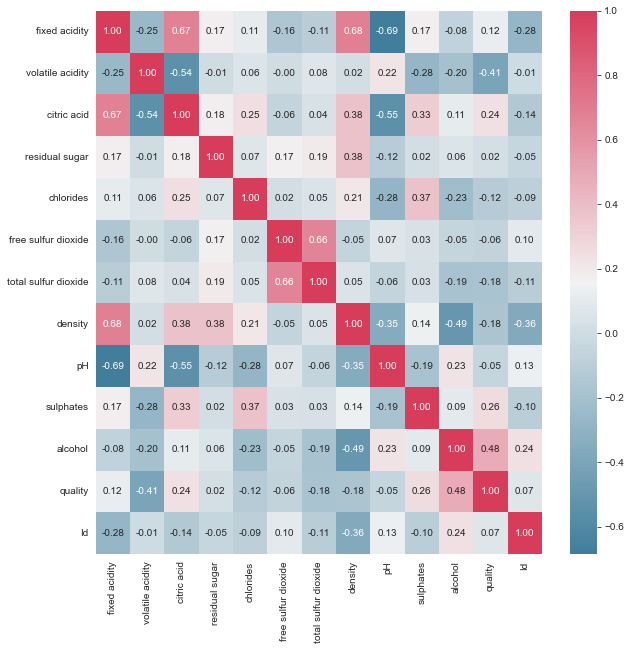

In [9]:
correlations = df.corr()
fig = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(230, 5, as_cmap=True)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
plt.show()

**The correlation plot gives us the correlation of all the attributes present in the database. The larger positive values indicate strong positive correlation and large negative values indicate strong negative correlation.**

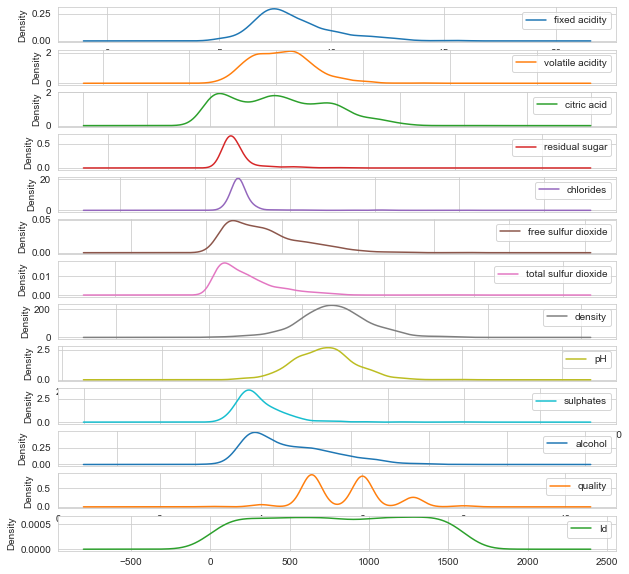

In [10]:
plot = df.plot(kind='density', subplots=True, figsize=(10, 10), sharex=False)
plt.show()

**Densities of all dataset atttributes are normally distributed.**

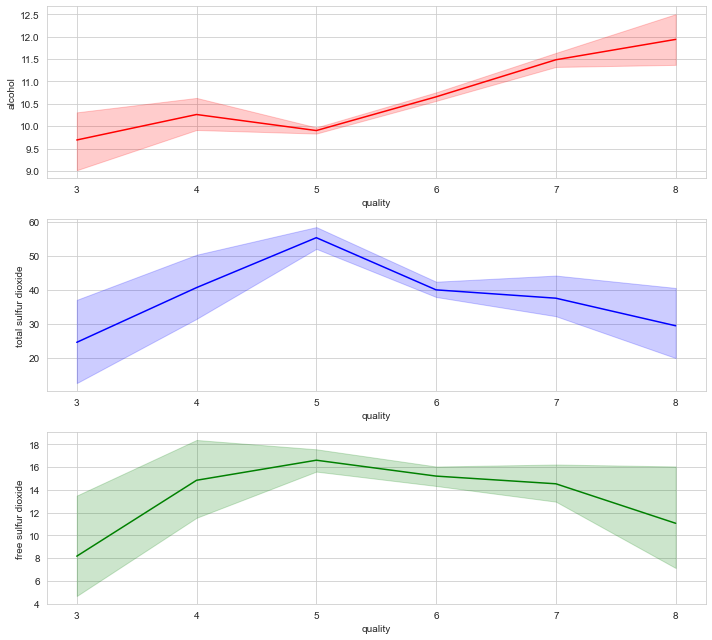

In [11]:
fig = plt.figure(figsize=(10, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1]) 

ax0 = plt.subplot(gs[0])
plot1 = sns.lineplot(data=df, x="quality",y="alcohol", color='r')

ax1 = plt.subplot(gs[1])
plot2 = sns.lineplot(data=df, x="quality",y="total sulfur dioxide", color='b')

ax2 = plt.subplot(gs[2])
plot3 = sns.lineplot(data=df, x="quality",y="free sulfur dioxide", color='g')

plt.tight_layout()

**Effect of the alcohol and sulpher dioxide levels on the quality of the wine.**

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
x = df.drop(['quality'] , axis = 1)

In [14]:
model = RandomForestRegressor(random_state=1, max_depth=12)
wd = pd.get_dummies(x)
model.fit(x, df.quality)
display(model.feature_importances_)

array([0.04952678, 0.12061187, 0.04753618, 0.04129022, 0.04948515,
       0.0410233 , 0.06682778, 0.04562811, 0.05130166, 0.13530718,
       0.29243305, 0.05902872])

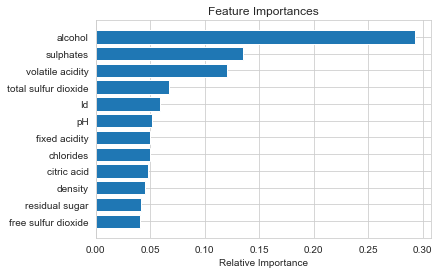

In [15]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
df['best quality'] = [1 if x > 6 else 0 for x in df.quality]
X = df.drop(['quality','best quality'], axis = 1)
Y = df['best quality']

df['best quality'].value_counts()

0    984
1    159
Name: best quality, dtype: int64

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=7)

**Logistic Regression**

In [18]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(ytest,ypred))

Accuracy Score: 0.8833819241982507


**K-Nearest Neighbours**

In [19]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print("Accuracy Score:",accuracy_score(ytest,ypred))

Accuracy Score: 0.8017492711370262


**Support Vector Machines**

In [20]:
model = SVC()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)


print("Accuracy Score:",accuracy_score(ytest,pred))

Accuracy Score: 0.8688046647230321


**Decision Trees**

In [21]:
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print("Accuracy Score:",accuracy_score(ytest,pred))

Accuracy Score: 0.880466472303207


**Naive Bayes**

In [22]:
model = GaussianNB()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print("Accuracy Score:",accuracy_score(ytest,pred))

Accuracy Score: 0.8483965014577259


**Random Forest**

In [23]:
model = RandomForestClassifier(random_state=1)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print("Accuracy Score:",accuracy_score(ytest,pred))

Accuracy Score: 0.8950437317784257


**XGBoost**

In [24]:
model = xgb.XGBClassifier(random_state=1)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print("Accuracy Score:",accuracy_score(ytest,pred))

Accuracy Score: 0.8950437317784257


**Deep Neural Networks**

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

tf.random.set_seed(40)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, ytrain, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.5223 - accuracy: 0.8200 - precision: 0.2500 - recall: 0.1316
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8587 - precision: 0.5217 - recall: 0.1053    
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8600 - precision: 0.5500 - recall: 0.0965    
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2783 - accuracy: 0.8712 - precision: 0.6571 - recall: 0.2018
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.8775 - precision: 0.6143 - recall: 0.3772
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8637 - precision: 0.5410 - recall: 0.2895    
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2434 - accuracy: 0.8913 - precision: 0.7143 - recall: 0.3947    
Epoch 8/100
25/25 [=============

In [26]:
pred = model.predict(X_test_scaled)

11/11 [==============================] - 0s 801us/step


In [27]:
pred_class = [1 if prob > 0.5 else 0 for prob in np.ravel(pred)]

In [28]:
print(f'Accuracy: {accuracy_score(ytest,pred_class):.2f}')

Accuracy: 0.87


### **Artificial Neural Networks Using Numpy and Pandas**

In [30]:
df=pd.read_csv("WineQT.csv")
columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

df.drop(['Id'],axis='columns',inplace=True)
df.dropna(subset=['quality'],inplace=True)

df['best quality'] = [1 if x > 6 else 0 for x in df.quality]
target = df['best quality']
features = df.drop(['quality'], axis=1)

labels = np.unique(features['best quality'].values)

idx_to_labels = { k:v for k,v in enumerate(labels) }
labels_to_idx = { v:k for k,v in enumerate(labels) }

labels = features.replace(labels_to_idx)['best quality'].values
df = features.drop(columns=['best quality'])
# one hot encoding
labels = np.eye(len(idx_to_labels))[labels]

df = (df-df.mean())/df.std()

df = df.fillna(df.std())
np.random.seed(1291)
features = df.values
print(features.shape)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

gamma = {}
gamma["ndims"] = features.shape[1]
gamma["nclasses"] = len(idx_to_labels.values())

(1143, 11)


In [31]:
def generate_weights(gamma):
    '''
        Generate Weights and use Xavier Initiation
    '''
    scale = 1/max(1., (2+2)/2.)
    limit = math.sqrt(3.0 * scale)

    gamma['w0'] = np.random.uniform(-limit, limit, size=(gamma['ndims'], gamma['ndims']))
    gamma['w1'] = np.random.uniform(-limit, limit, size=(gamma['ndims'], gamma['nclasses']))
    
    return gamma

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def dsigmoid(x):
    return x * (1. - x)

def loss(y, y_hat):
    '''
        Addition of all Squared Mean Errors
    '''
    return np.sum(np.mean(np.square(np.subtract(y, y_hat)), axis=0))

def forward(X, gamma):
    '''
        Forward Propagation
    '''
    l0 = X
    l1 = sigmoid(np.dot(l0, gamma['w0']))
    l2 = sigmoid(np.dot(l1, gamma['w1']))
    
    return l0, l1, l2

def backward(y, theta, gamma, lr):
    '''
        Backward Propagation
    '''
    l0, l1, l2 = theta
    
    l2_error = y - l2
    l2_delta = l2_error * dsigmoid(l2)
    l1_error = l2_delta.dot(gamma['w1'].T)
    l1_delta = l1_error * dsigmoid(l1)
    # update using SGD
    gamma['w0'] += lr * l0.T.dot(l1_delta)
    gamma['w1'] += lr * l1.T.dot(l2_delta)
    
    return gamma

def train(X, y, gamma, iterations=300, lr=0.0605):
    '''
        Function to Train Dataset
    '''
    errors = []
    for i in range(iterations):
        # forward propagation
        theta = forward(X, gamma)
        
        e = loss(theta[-1], y)
        if(i % 4 == 0):
            print('I:{0:4d}, --  Mean Error: {1:1.4f}'.format(i, np.mean(e)))
        errors.append(e)
        # backward propagation
        gamma = backward(y, theta, gamma, lr)
    return gamma, errors

def accuracy_measure(y_true, y_pred):
    acc=0
    for i in range(len(y_true)):
        if(y_true[i][0]==y_pred[i][0] and y_true[i][1]==y_pred[i][1]):
            acc=acc+1
    return acc/len(y_true)

def accuracy(y, gamma):
    '''
    Function to calculate accuracy
    '''
    acc_y=[]
    for x in X_test:
        g = np.argmax(forward(x.reshape(1, 11), gamma)[-1])
        g = np.eye(gamma["nclasses"])[g]
        acc_y.append(g)
    acc_y = np.array(acc_y)
    return accuracy_measure(y,acc_y)

In [32]:
print("---------------BEGIN TRAINING---------------")

gamma = generate_weights(gamma)
gamma, errors = train(X_train, y_train, gamma)

---------------BEGIN TRAINING---------------
I:   0, --  Mean Error: 0.7000
I:   4, --  Mean Error: 0.2794
I:   8, --  Mean Error: 0.2794
I:  12, --  Mean Error: 0.2793
I:  16, --  Mean Error: 0.2791
I:  20, --  Mean Error: 0.2789
I:  24, --  Mean Error: 0.2784
I:  28, --  Mean Error: 0.2771
I:  32, --  Mean Error: 0.2720
I:  36, --  Mean Error: 0.2523
I:  40, --  Mean Error: 0.2320
I:  44, --  Mean Error: 0.2162
I:  48, --  Mean Error: 0.1974
I:  52, --  Mean Error: 0.1811
I:  56, --  Mean Error: 0.1715
I:  60, --  Mean Error: 0.1670
I:  64, --  Mean Error: 0.1645
I:  68, --  Mean Error: 0.1626
I:  72, --  Mean Error: 0.1610
I:  76, --  Mean Error: 0.1594
I:  80, --  Mean Error: 0.1577
I:  84, --  Mean Error: 0.1561
I:  88, --  Mean Error: 0.1545
I:  92, --  Mean Error: 0.1529
I:  96, --  Mean Error: 0.1515
I: 100, --  Mean Error: 0.1501
I: 104, --  Mean Error: 0.1488
I: 108, --  Mean Error: 0.1475
I: 112, --  Mean Error: 0.1463
I: 116, --  Mean Error: 0.1452
I: 120, --  Mean Error: 0

In [33]:
print('Accuracy:{0:3d}%'.format(int(accuracy(y_test, gamma) * 100)))

Accuracy: 86%
